In [1]:
from bcb import TaxaJuros as txj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from datetime import datetime as dt
from PIL import Image
import plotly.offline as py
import plotly.graph_objs as go
import random as rd
py.init_notebook_mode(connected=True)

In [2]:
memoria = txj()

In [3]:
ep = memoria.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')

In [4]:
df_cheque = (ep.query().filter(ep.Segmento == 'PESSOA FÍSICA',
                               ep.Modalidade ==
                               'CHEQUE ESPECIAL - PRÉ-FIXADO').collect())

In [5]:
df_cheque['InicioPeriodo'] = pd.to_datetime(df_cheque['InicioPeriodo'])


In [6]:
df_cheque.drop(columns=['FimPeriodo', 'cnpj8', 'Modalidade',
                        'Segmento', 'TaxaJurosAoAno', 'Posicao'],
               inplace=True)

In [7]:
df_cheque

,InicioPeriodo,codigoSegmento,codigoModalidade,InstituicaoFinanceira,TaxaJurosAoMes
0,2023-01-23,None,None,BCO ALFA S.A.,2.32
1,2023-01-23,None,None,BCO BMG S.A.,3.46
2,2023-01-23,None,None,BCO SOFISA S.A.,3.53
3,2023-01-23,None,None,BANCO SICOOB S.A.,4.41
4,2023-01-23,None,None,BCO DO NORDESTE DO BRASIL S.A.,4.93
...,...,...,...,...,...
85000,2012-01-02,None,None,BCO RENDIMENTO S.A.,9.01
85001,2012-01-02,None,None,BCO MERCANTIL DO BRASIL S.A.,9.07
85002,2012-01-02,None,None,KIRTON BANK,9.29
85003,2012-01-02,None,None,BCO CITIBANK S.A.,9.86


In [8]:
mercado = df_cheque.groupby(df_cheque['InicioPeriodo'])['TaxaJurosAoMes'].mean().round(2)

In [9]:
df_cheque['InstituicaoFinanceira'].unique()

array(['BCO ALFA S.A.', 'BCO BMG S.A.', 'BCO SOFISA S.A.',
       'BANCO SICOOB S.A.', 'BCO DO NORDESTE DO BRASIL S.A.',
       'BCO BANESTES S.A.', 'BCO CCB BRASIL S.A.',
       'BRB - BCO DE BRASILIA S.A.', 'BCO DO EST. DO PA S.A.',
       'BCO DAYCOVAL S.A', 'CAIXA ECONOMICA FEDERAL', 'BCO SAFRA S.A.',
       'BCO DA AMAZONIA S.A.', 'BCO DO BRASIL S.A.', 'BANCO ORIGINAL',
       'BCO DO ESTADO DO RS S.A.', 'BANCO BTG PACTUAL S.A.',
       'BANCO INTER', 'ITAÚ UNIBANCO S.A.', 'BANCO PAN',
       'BCO BRADESCO S.A.', 'BCO SANTANDER (BRASIL) S.A.',
       'BCO DO EST. DE SE S.A.', 'BCO C6 S.A.', 'BCO AGIBANK S.A.',
       'BCO TRIANGULO S.A.', 'BCO DIGIMAIS S.A.',
       'BCO MERCANTIL DO BRASIL S.A.', 'BCO MODAL S.A.',
       'BCO RENDIMENTO S.A.', 'BANCO SEMEAR', 'BCO CREFISA S.A.',
       'BCO PAULISTA S.A.', 'BCO LUSO BRASILEIRO S.A.',
       'BCO ABC BRASIL S.A.', 'BCO RIBEIRAO PRETO S.A.',
       'BANCOSEGURO S.A.', 'BCO PINE S.A.', 'OMNI BANCO S.A.',
       'BCO INDUSTRIAL DO BR

In [10]:
df_bancos = df_cheque.pivot(index='InicioPeriodo',
                            columns='InstituicaoFinanceira',
                            values='TaxaJurosAoMes').reset_index()

In [11]:
df_bancos.drop(columns=[
    'BCO RIBEIRAO PRETO S.A.', 'BCO ALFA S.A.', 'BCO PAULISTA S.A.',
    'BANCO SEMEAR', 'BCO BMG S.A.', 'BCO SOFISA S.A.', 'BANCO SICOOB S.A.',
    'BCO MODAL S.A.', 'BCO DO NORDESTE DO BRASIL S.A.', 'BCO CCB BRASIL S.A.',
    'BCO PINE S.A.', 'BCO BANESTES S.A.', 'BCO DO EST. DO PA S.A.',
    'BCO SAFRA S.A.', 'BCO LUSO BRASILEIRO S.A.',
    'BCO DA AMAZONIA S.A.', 'BCO DAYCOVAL S.A',
    'BCO DO ESTADO DO RS S.A.', 'BANCO PAN',
    'BANCO ORIGINAL', 'BCO DO EST. DE SE S.A.', 'BCO RENDIMENTO S.A.',
    'BCO AGIBANK S.A.', 'BCO C6 S.A.', 'BCO TRIANGULO S.A.',
    'BCO MERCANTIL DO BRASIL S.A.', 'BCO DIGIMAIS S.A.', 'BANCOSEGURO S.A.',
    'BANCO BTG PACTUAL S.A.', 'OMNI BANCO S.A.',
    'BCO INDUSTRIAL DO BRASIL S.A.', 'BCO ABC BRASIL S.A.',
    'BRB - BCO DE BRASILIA S.A.', 'BCO CEDULA S.A.', 'PARANA BCO S.A.',
    'BCO BS2 S.A.', 'BCO CREFISA S.A.', 'BCO FIBRA S.A.', 'BCO FATOR S.A.',
    'SOCIAL BANK S/A', 'NOVO BCO CONTINENTAL S.A. - BM', 'BANCO VOITER',
    'BCO J.P. MORGAN S.A.', 'BCO LA NACION ARGENTINA', 'BCO CITIBANK S.A.',
    'BANIF BRASIL BM S.A.', 'KIRTON BANK', 'BCO DA CHINA BRASIL S.A.',
    'PICPAY BANK - BANCO MÚLTIPLO S.A', 'BCO BVA S.A.',
    'BCO CRUZEIRO DO SUL S.A.', 'BCO PROSPER S.A.', 'BCO VOTORANTIM S.A.'],
    inplace=True
)

In [12]:
df_bancos

InstituicaoFinanceira,InicioPeriodo,BANCO INTER,BCO BRADESCO S.A.,BCO DO BRASIL S.A.,BCO SANTANDER (BRASIL) S.A.,CAIXA ECONOMICA FEDERAL,ITAÚ UNIBANCO S.A.
0,2012-01-02,NaN,8.20,8.20,9.94,8.05,8.53
1,2012-01-03,NaN,8.20,8.19,9.93,8.03,8.58
2,2012-01-04,NaN,8.17,8.18,9.96,8.05,8.61
3,2012-01-05,NaN,8.17,8.18,9.97,8.04,8.61
4,2012-01-06,NaN,8.16,8.16,9.98,8.04,8.64
...,...,...,...,...,...,...,...
2773,2023-01-17,7.98,8.20,7.88,8.23,7.52,8.12
2774,2023-01-18,7.98,8.22,7.88,8.23,7.52,8.14
2775,2023-01-19,7.98,8.20,7.88,8.23,7.53,8.14
2776,2023-01-20,7.98,8.19,7.88,8.24,7.53,8.12


In [13]:
df_bancos.rename(columns={'BANCO INTER': 'Inter', 'BCO BRADESCO S.A.' : 'Bradesco'
    , 'BCO SANTANDER (BRASIL) S.A.' : 'Santander', 'CAIXA ECONOMICA FEDERAL': 'Caixa',
    'ITAÚ UNIBANCO S.A.':'Itaú','BCO DO BRASIL S.A.': 'Bco do Brasil', 'InstituicaoFinanceira' :'index'       
}, inplace = True)

In [14]:
graph = df_bancos[df_bancos['InicioPeriodo'] >= '2020-01-01']

In [15]:
graph.set_index(graph['InicioPeriodo'], inplace=True)

In [16]:
graph.drop(columns=['InicioPeriodo'], inplace= True)

C:\Users\Hugo Martins\AppData\Local\Temp\ipykernel_28640\4188141071.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
graph

InstituicaoFinanceira,Inter,Bradesco,Bco do Brasil,Santander,Caixa,Itaú
InicioPeriodo,,,,,,
2020-01-02,3.46,10.16,9.84,11.44,6.49,9.42
2020-01-03,3.46,9.04,8.81,9.41,6.34,8.79
2020-01-06,3.46,8.27,8.11,8.23,6.41,8.47
2020-01-07,3.46,8.26,8.11,8.23,6.41,8.52
2020-01-08,3.46,8.28,8.10,8.23,6.42,8.55
...,...,...,...,...,...,...
2023-01-17,7.98,8.20,7.88,8.23,7.52,8.12
2023-01-18,7.98,8.22,7.88,8.23,7.52,8.14
2023-01-19,7.98,8.20,7.88,8.23,7.53,8.14


In [18]:
graph.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 769 entries, 2020-01-02 to 2023-01-23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Inter          687 non-null    float64
 1   Bradesco       769 non-null    float64
 2   Bco do Brasil  769 non-null    float64
 3   Santander      760 non-null    float64
 4   Caixa          769 non-null    float64
 5   Itaú           769 non-null    float64
dtypes: float64(6)
memory usage: 42.1 KB


In [19]:
market = f'{"{:.2%}".format(mercado.iloc[-1]/100)} Mercado'
market

'7.03% Mercado'

In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [21]:
data = graph.index.to_pydatetime()

In [22]:
nomes = {
    'Bradesco' : {
        'label': f'{"{:.2%}".format(graph["Bradesco"].iloc[-1]/100)} Bradesco',
        'color': '#de0668',
    },
    'Itaú': {
        'label': f'{"{:.2%}".format(graph["Itaú"].iloc[-1]/100)} Itaú',
        'color': '#FFA500',
    },
    'Santander': {
        'label': f'{"{:.2%}".format(graph["Santander"].iloc[-1]/100)} Santander',
        'color': '#06de7c',
    },
    'Inter': {
        'label': f'{"{:.2%}".format(graph["Inter"].iloc[-1]/100)} Inter',
        'color': '#808080',
    },
    'Bco do Brasil' : {
        'label': f'{"{:.2%}".format(graph["Bco do Brasil"].iloc[-1]/100)} BB',
        'color': '#d4de06',
    },
    'Caixa': {
        'label': f'{"{:.2%}".format(graph["Caixa"].iloc[-1]/100)} Caixa',
        'color': '#1c60ab',
    }
}


In [66]:
lista_banco = list(nomes.keys())

In [65]:
plots = []
titulo = go.Layout(title=f'Taxa Média do Cheque Especial {graph.index[-1].strftime("%d/%m/%Y")}',
                  titlefont={'size':25,
                             'color':'#FFA500'},
                   font={'size':16},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)'
                    )


while True:
    banco = rd.choice(lista_banco)
    maxi = max(graph[lista_banco].iloc[-1])
    if graph[banco].iloc[-1] == maxi:
        del(lista_banco[lista_banco.index(banco)])
        plots.append(go.Scatter(x = data, y = graph[banco]/100, mode='lines', name= nomes[banco]['label'],
                                marker = {'color':f'{nomes[banco]["color"]}'}))

    if len(lista_banco) == 0:
        break
    
plots.append(go.Scatter(x = data, y = mercado[mercado.index >= '2020-01-01']/100, mode='lines', name= market,
                                marker = {'color':'#000000'}))

fig = go.Figure(data=plots, layout=titulo)
fig.update_yaxes(tickformat=".2%")
py.iplot(fig)

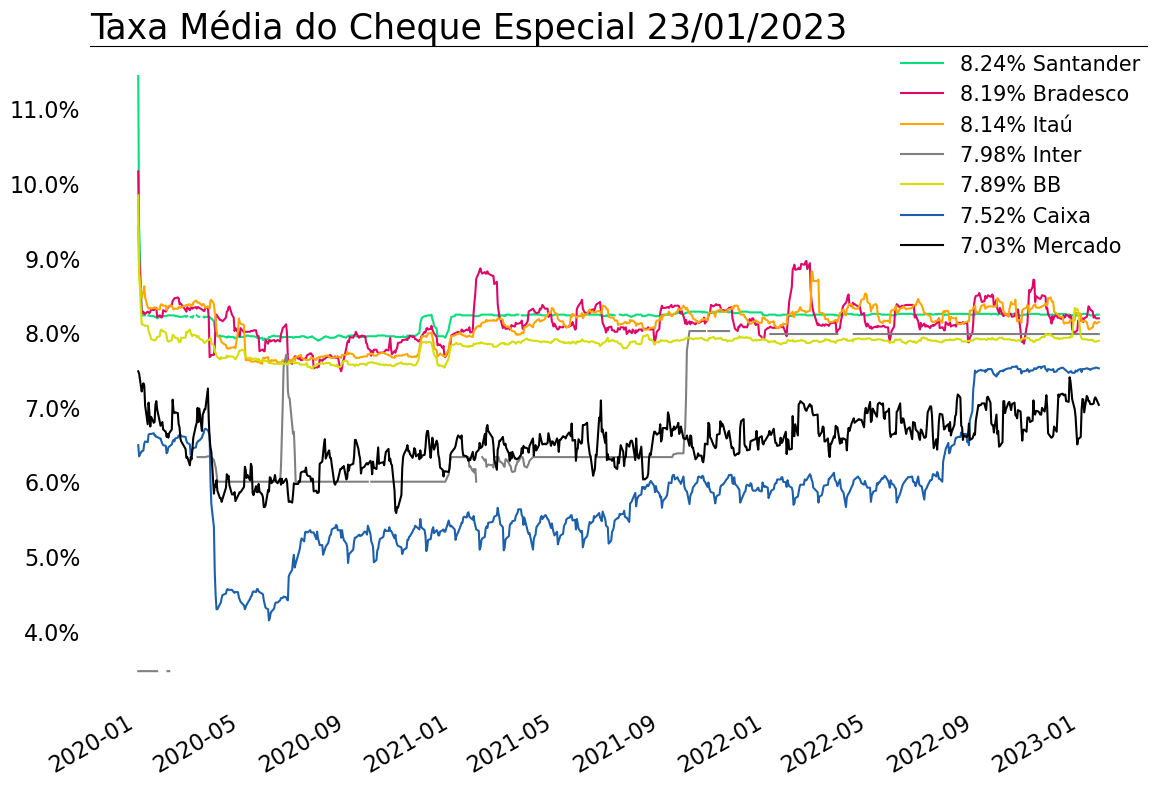

In [67]:
# plt.style.use('default')
plt.figure(figsize=[12,8])
plt.title(f'Taxa Média do Cheque Especial {graph.index[-1].strftime("%d/%m/%Y")}', loc = 'left', fontsize=25)

while True:
    banco = rd.choice(lista_banco)
    maxi = max(graph[lista_banco].iloc[-1])
    
    if graph[banco].iloc[-1] == maxi:
        del(lista_banco[lista_banco.index(banco)])
        plt.plot(data,graph[banco], label=nomes[banco]['label'], c=nomes[banco]['color'])
    
    if len(lista_banco) == 0:
        break

plt.plot(data, mercado[mercado.index >= '2020-01-01'], 'black',label=market)


# Get the current axes
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Get the current figure
plt.gcf().autofmt_xdate()

# If you want to see all the rcParams https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


plt.legend(bbox_to_anchor=(0.75, 0.65), fontsize=15, frameon=False)
plt.tight_layout()
plt.show()